In [1]:
%load_ext lab_black

In [1]:
import requests, json, random
import pandas as pd
import plotly.express as px
from config import weather_api_key
from config import g_key
from config import mapbox_token
from citipy import citipy
from datetime import date

In [2]:
px.set_mapbox_access_token(mapbox_token)

In [65]:
# Build list of random coordinates
coordinate_list = []
counter = 0
number_of_points = 500

while counter < number_of_points:
    lat = round(random.uniform(-90, 90), 6)
    lon = round(random.uniform(-180, 180), 6)
    counter += 1
    coordinate_list.append((lat, lon))

# Assign nearest city to given set of coordinates (no duplicates)
cities = []
city_count = 0

for coords in coordinate_list:
    city = citipy.nearest_city(coords[0], coords[1])
    if city.city_name not in cities:
        cities.append(city.city_name)
        city_count += 1

In [66]:
# Obtain weather data for cities in the list
cities_results = []
count = 0
found_count = 0
not_found_count = 0

print("Beginning data retrieval:\n")
print(50 * "-")

for citi in cities:
    endpoint = "http://api.openweathermap.org/data/2.5/weather"
    payload = {"q": citi, "appid": weather_api_key, "units": "imperial"}

    r = requests.get(url=endpoint, params=payload)

    count += 1

    if r.status_code == 200:
        data = r.json()
        cities_results.append(data)
        print("Processing record: ", count, " | ", citi)
        found_count += 1
    else:
        print("Processing record: ", count, " | ", citi, " *Not Found*")
        not_found_count += 1

Beginning data retrieval:

--------------------------------------------------
Processing record:  1  |  avarua
Processing record:  2  |  goderich
Processing record:  3  |  mys shmidta  *Not Found*
Processing record:  4  |  vaini
Processing record:  5  |  ponta do sol
Processing record:  6  |  la ronge
Processing record:  7  |  bull savanna
Processing record:  8  |  hutchinson
Processing record:  9  |  carteret
Processing record:  10  |  punta arenas
Processing record:  11  |  hirado
Processing record:  12  |  vao
Processing record:  13  |  bam
Processing record:  14  |  hilo
Processing record:  15  |  vila franca do campo
Processing record:  16  |  hithadhoo
Processing record:  17  |  kavieng
Processing record:  18  |  valente
Processing record:  19  |  dikson
Processing record:  20  |  klaksvik
Processing record:  21  |  portland
Processing record:  22  |  albany
Processing record:  23  |  esperance
Processing record:  24  |  khatanga
Processing record:  25  |  arraial do cabo
Process

In [95]:
r.status_code

200

In [97]:
found_count

259

In [98]:
not_found_count

21

In [99]:
cities_results[0]

{'coord': {'lon': -159.78, 'lat': -21.21},
 'weather': [{'id': 301,
   'main': 'Drizzle',
   'description': 'drizzle',
   'icon': '09d'}],
 'base': 'stations',
 'main': {'temp': 73.4,
  'feels_like': 75.69,
  'temp_min': 73.4,
  'temp_max': 73.4,
  'pressure': 1017,
  'humidity': 88},
 'visibility': 6000,
 'wind': {'speed': 9.17, 'deg': 120},
 'clouds': {'all': 87},
 'dt': 1601058010,
 'sys': {'type': 1,
  'id': 7271,
  'country': 'CK',
  'sunrise': 1601051105,
  'sunset': 1601094956},
 'timezone': -36000,
 'id': 4035715,
 'name': 'Avarua',
 'cod': 200}

In [100]:
# Build a dataframe from the json weather data
city_data = []

for city in cities_results:
    city_data.append(
        {
            "City": city["name"],
            "Country": city["sys"]["country"],
            "Lat": city["coord"]["lat"],
            "Long": city["coord"]["lon"],
            "Temp_max": city["main"]["temp_max"],
            "Humidity": city["main"]["humidity"],
            "Cloudiness": city["clouds"]["all"],
            "Wind_Speed": city["wind"]["speed"],
        }
    )

city_weather_df = pd.DataFrame(city_data)
city_weather_df.to_csv("data/vacation_weather_data.csv", index=False)
city_weather_df

,City,Country,Lat,Long,Temp_max,Humidity,Cloudiness,Wind_Speed
0,Avarua,CK,-21.21,-159.78,73.40,88,87,9.17
1,Goderich,CA,43.75,-81.72,78.01,72,0,5.75
2,Vaini,TO,-21.20,-175.20,69.80,94,75,4.70
3,Ponta do Sol,PT,32.67,-17.10,75.00,77,19,3.00
4,La Ronge,CA,55.10,-105.28,59.00,67,40,11.41
...,...,...,...,...,...,...,...,...
254,Petropavlovsk-Kamchatskiy,RU,53.05,158.65,33.80,80,0,2.24
255,São Filipe,CV,14.90,-24.50,80.37,76,43,5.46
256,Balotra,IN,25.83,72.23,87.35,55,5,14.65
257,Manuk Mangkaw,PH,4.80,119.85,84.47,65,13,2.93


In [113]:
# Make a new dataframe by filtering to desired weather conditions
hotel_df = city_weather_df.loc[
    (city_weather_df["Cloudiness"] < 10)
    & (city_weather_df["Wind_Speed"] < 10)
    & (city_weather_df["Temp_max"] > 70)
    & (city_weather_df["Temp_max"] < 80)
]
hotel_df

,City,Country,Lat,Long,Temp_max,Humidity,Cloudiness,Wind_Speed
1,Goderich,CA,43.75,-81.72,78.01,72,0,5.75
7,Carteret,US,40.58,-74.23,79.00,50,1,4.70
11,Bam,IR,29.11,58.36,70.88,18,0,7.27
27,Jamestown,US,42.10,-79.24,79.00,56,1,6.93
69,La Palma,US,33.85,-118.05,75.99,60,1,4.70
97,Faya,SA,18.39,42.45,73.40,60,0,8.05
107,Broome,US,42.25,-75.83,79.00,53,1,9.17
151,Bethel,US,41.37,-73.41,79.00,50,1,4.34
192,Koumac,NC,-20.57,164.28,71.85,86,0,3.87


In [114]:
hotel_df["Hotel_Name"] = ""
hotel_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,City,Country,Lat,Long,Temp_max,Humidity,Cloudiness,Wind_Speed,Hotel_Name
1,Goderich,CA,43.75,-81.72,78.01,72,0,5.75,
7,Carteret,US,40.58,-74.23,79.00,50,1,4.70,
11,Bam,IR,29.11,58.36,70.88,18,0,7.27,
27,Jamestown,US,42.10,-79.24,79.00,56,1,6.93,
69,La Palma,US,33.85,-118.05,75.99,60,1,4.70,
97,Faya,SA,18.39,42.45,73.40,60,0,8.05,
107,Broome,US,42.25,-75.83,79.00,53,1,9.17,
151,Bethel,US,41.37,-73.41,79.00,50,1,4.34,
192,Koumac,NC,-20.57,164.28,71.85,86,0,3.87,


In [115]:
cities_results[0]

{'coord': {'lon': -159.78, 'lat': -21.21},
 'weather': [{'id': 301,
   'main': 'Drizzle',
   'description': 'drizzle',
   'icon': '09d'}],
 'base': 'stations',
 'main': {'temp': 73.4,
  'feels_like': 75.69,
  'temp_min': 73.4,
  'temp_max': 73.4,
  'pressure': 1017,
  'humidity': 88},
 'visibility': 6000,
 'wind': {'speed': 9.17, 'deg': 120},
 'clouds': {'all': 87},
 'dt': 1601058010,
 'sys': {'type': 1,
  'id': 7271,
  'country': 'CK',
  'sunrise': 1601051105,
  'sunset': 1601094956},
 'timezone': -36000,
 'id': 4035715,
 'name': 'Avarua',
 'cod': 200}

In [116]:
for i in hotel_df.index:

    lat = hotel_df.loc[i, "Lat"]

    lng = hotel_df.loc[i, "Long"]

    lat_lng_str = str(lat) + "," + str(lng)

    try:
        r = requests.get(
            "https://maps.googleapis.com/maps/api/place/nearbysearch/json",
            params={
                "location": lat_lng_str,
                "radius": 5000,
                "type": "lodging",
                "key": g_key,
            },
        )
        hotel_df.loc[i, "Hotel_Name"] = r.json()["results"][0]["name"]
    except:
        pass
hotel_df

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,City,Country,Lat,Long,Temp_max,Humidity,Cloudiness,Wind_Speed,Hotel_Name
1,Goderich,CA,43.75,-81.72,78.01,72,0,5.75,Harmony Inn
7,Carteret,US,40.58,-74.23,79.00,50,1,4.70,Hotel Executive Suites
11,Bam,IR,29.11,58.36,70.88,18,0,7.27,Bam Tourist Hotel
27,Jamestown,US,42.10,-79.24,79.00,56,1,6.93,Hampton Inn & Suites Jamestown
69,La Palma,US,33.85,-118.05,75.99,60,1,4.70,La Quinta Inn & Suites by Wyndham Buena Park
97,Faya,SA,18.39,42.45,73.40,60,0,8.05,مقبرة ال مجمل
107,Broome,US,42.25,-75.83,79.00,53,1,9.17,Chenango Valley State Park
151,Bethel,US,41.37,-73.41,79.00,50,1,4.34,Courtyard by Marriott Danbury
192,Koumac,NC,-20.57,164.28,71.85,86,0,3.87,Le Monitel


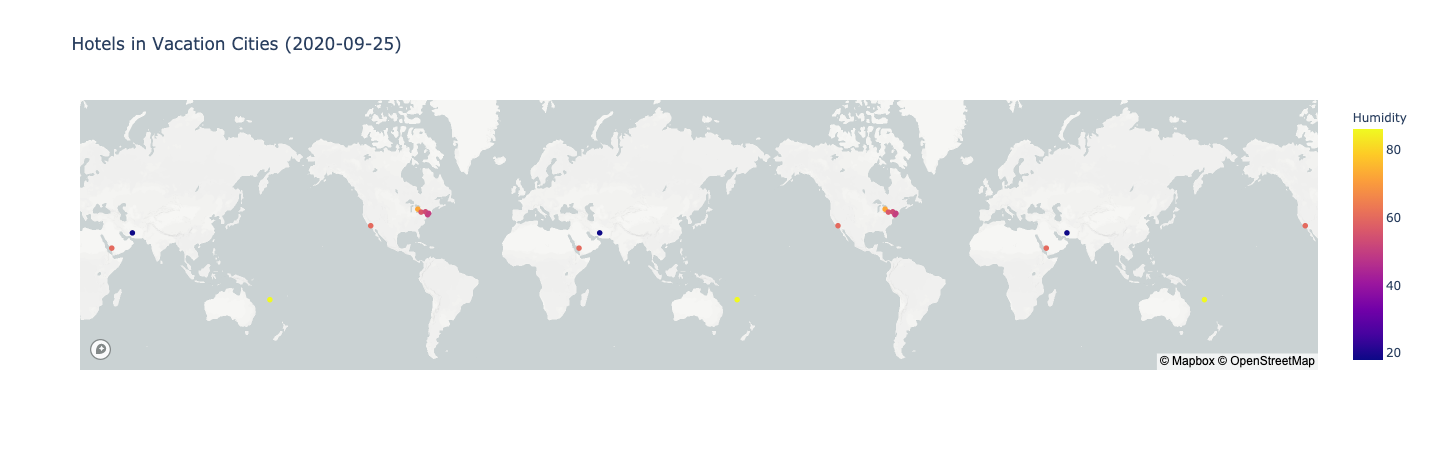

In [111]:
# Map observations with Plotly
today = date.today()

fig = px.scatter_mapbox(
    hotel_df,
    lat="Lat",
    lon="Long",
    color="Humidity",
    hover_data=["Hotel_Name", "City", "Country"],
    title=(f"Hotels in Vacation Cities ({today})"),
)

fig.show()